In [56]:
from typing import TypedDict ,List
from langgraph.graph import StateGraph
import requests

In [57]:
class MyState(TypedDict):
    numbers : List[int]
    result : str

In [58]:
def addition(state: MyState)->MyState:
    values = state['numbers']
    total = sum(values)
    state['result'] = f"The sum is {total}"
    return state

In [ ]:
# TODO: Write the multiplication function that calls the FastAPI endpoint


def multiplication(state: MyState)->MyState:
    values = state['numbers']
    try:
        response = requests.post(
            "http://localhost:8000/multiply",
            json={"numbers":values}
        )
        print(response.json())
        print("\n---------\n")
        response.raise_for_status()
        product = response.json()["product"]
        state['result'] = state['result'] + f" The product is {product}"
    except requests.exceptions.RequestException as e:
        state["result"] = state["result"] + f" Error calling multiplication API: {str(e)}"
    return state 

In [72]:
multiplication(MyState(numbers=[1,2,3,4,5],result=""))

{'product': 120}

---------



{'numbers': [1, 2, 3, 4, 5], 'result': ' The product is 120'}

In [60]:
def subtraction(state: MyState)->MyState:
    values = state['numbers']
    total = sum(values)
    values = [total - values[i] for i in range(len(values))]
    state['result'] =  state['result'] + f" The difference is {values}"
    return state

In [61]:
graph = StateGraph(MyState)

In [62]:
graph.add_node("adder" , addition)
graph.add_node("subtractor" , subtraction)
# TODO: Add the multiplicator node
graph.add_node("multiplicator" , multiplication)

graph.add_edge("adder" , "subtractor")
# TODO: Add edge from subtractor to multiplicator
graph.add_edge("subtractor" , "multiplicator")

In [63]:
graph.set_entry_point("adder")
graph.set_finish_point("multiplicator")  # TODO: Change this to "multiplicator" when you add the multiplication node

In [64]:
app = graph.compile()

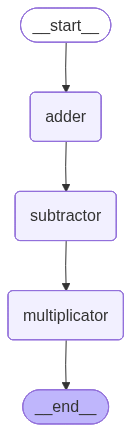

In [65]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [66]:
result = app.invoke({"numbers":[1,2,3,4,5]})

<Response [200]>

---------



In [67]:
print(result["result"])

The sum is 15 The difference is [14, 13, 12, 11, 10] The product is 120
